In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("data.csv")

x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]
x3 = data.iloc[:, 2]
x4 = data.iloc[:, 3]
x5 = data.iloc[:, 4]   
y = data.iloc[:, 5]

print(data.head())

         X1        X2        X3        X4        X5         y
0  0.496714 -0.138264  0.647689  1.523030 -0.234153  2.583221
1 -0.234137  1.579213  0.767435 -0.469474  0.542560  1.169521
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918  6.068924
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304  4.025751
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383  9.115352


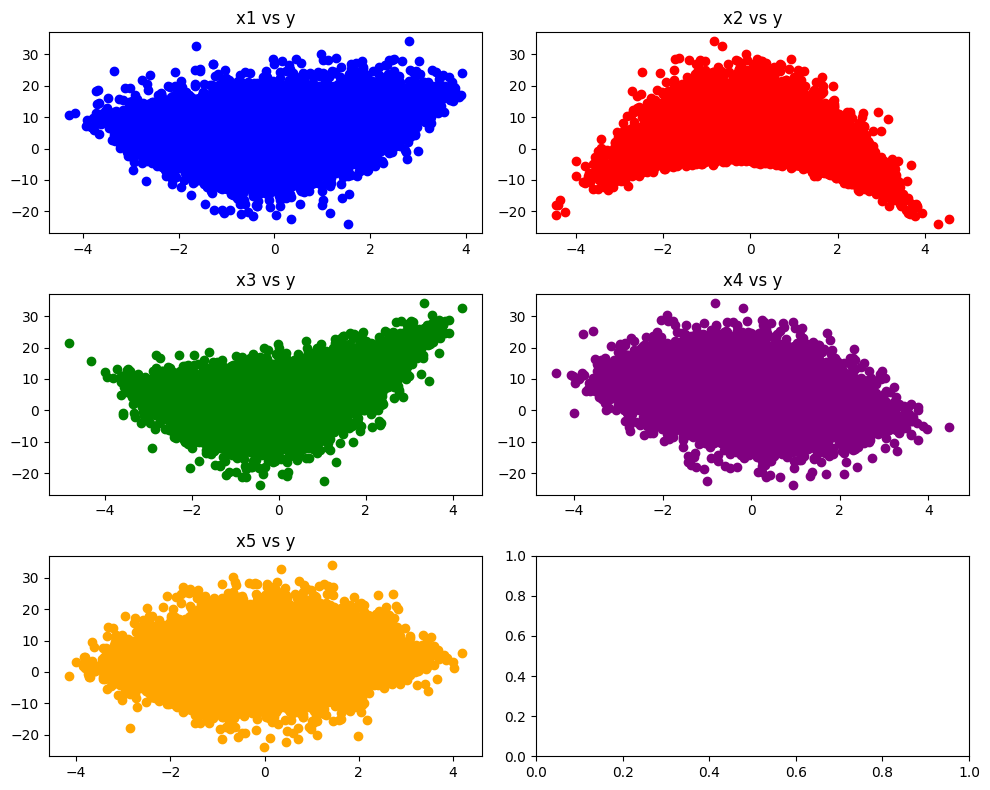

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # 3 rows, 2 columns

axes[0, 0].scatter(x1, y, color="blue")
axes[0, 0].set_title("x1 vs y")

axes[0, 1].scatter(x2, y, color="red")
axes[0, 1].set_title("x2 vs y")

axes[1, 0].scatter(x3, y, color="green")
axes[1, 0].set_title("x3 vs y")

axes[1, 1].scatter(x4, y, color="purple")
axes[1, 1].set_title("x4 vs y")

axes[2, 0].scatter(x5, y, color="orange")
axes[2, 0].set_title("x5 vs y")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

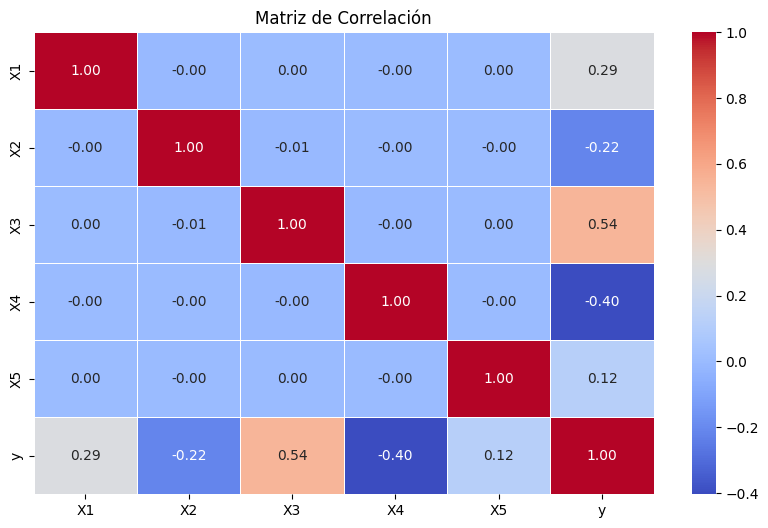

In [4]:
corr_matrix = data.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación")
plt.show()

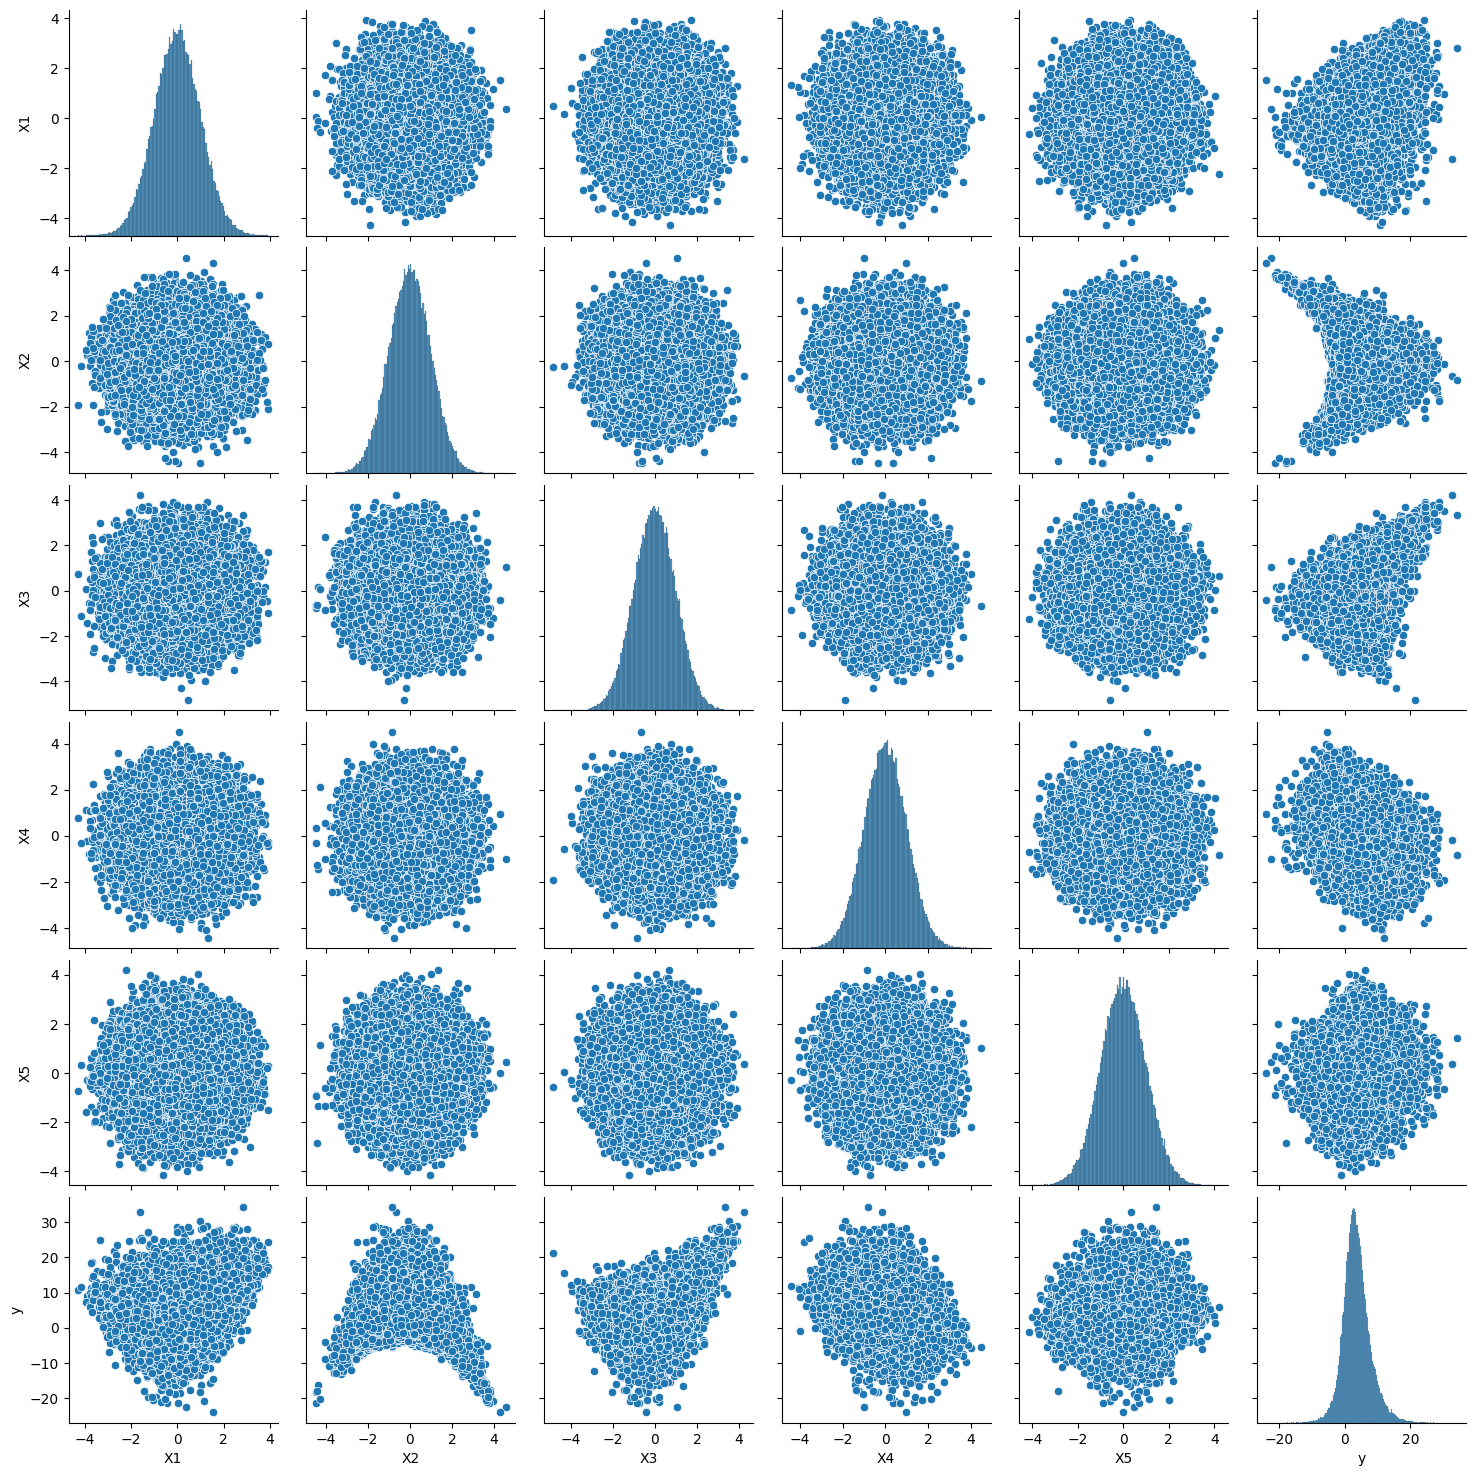

In [5]:
sns.pairplot(data)
plt.show()

In [29]:
n = 3 # Grado maximo del polinomio

# Extraer todas las variables predictoras (todas las columnas excepto la última)
X = data.iloc[:, :-1].values
# Extraer la variable dependiente
y = data.iloc[:, -1].values 
# Iterar sobre los grados del polinomio (de 1 a n)
for i in range(1, n+1):
    # Construir la matriz de diseño con términos polinómicos manualmente
    X_poly = np.hstack([np.ones((X.shape[0], 1))] + [X**p for p in range(1, i+1)])

    # Aplicar la ecuación normal para calcular los coeficientes theta
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    # Calcular el número de condición
    cond_number = np.linalg.cond(X_poly.T @ X_poly)

    # Imprimir el número de condición
    print(f"Número de condición para polinomio de grado {i}: {cond_number}")

    # Imprimir los coeficientes obtenidos
    print(f"Coeficientes theta para polinomio de grado {i}:")
    print(theta)

Número de condición para polinomio de grado 1: 1.0244070144245496
Coeficientes theta para polinomio de grado 1:
[ 3.59615877  1.19461459 -0.89613225  2.27489442 -1.69655279  0.49387752]
Número de condición para polinomio de grado 2: 29.987803924163813
Coeficientes theta para polinomio de grado 2:
[ 2.99973401e+00  1.20105427e+00 -8.97602942e-01  2.30039459e+00
 -1.70227003e+00  4.98601667e-01  7.99920510e-01 -1.29968780e+00
  1.09998081e+00 -1.06390004e-02 -5.43742360e-04]
Número de condición para polinomio de grado 3: 61.21574690085057
Coeficientes theta para polinomio de grado 3:
[ 2.99975965e+00  1.20165961e+00 -8.96968388e-01  2.30102956e+00
 -1.70133201e+00  4.99088137e-01  7.99917768e-01 -1.29969166e+00
  1.09997235e+00 -1.06551409e-02 -5.42575644e-04 -2.01248682e-04
 -2.15253852e-04 -2.13305527e-04 -3.12049690e-04 -1.60748577e-04]


In [27]:
# Número total de datos
num_datos = data.shape[0]
print("Numero total de datos:", num_datos)

# Mezclar los índices de los datos
np.random.seed(42)
indices = np.random.permutation(num_datos)

# Separar en 80% entrenamiento y 20% prueba
train_size = int(0.8 * num_datos)  # 80% del total

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Crear los conjuntos de entrenamiento y prueba
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

print(f"Datos de entrenamiento: {train_data.shape[0]}")
print(f"Datos de prueba: {test_data.shape[0]}")

Numero total de datos: 100000
Datos de entrenamiento: 80000
Datos de prueba: 20000


In [ ]:
n = 3 # Grado maximo del polinomio

# Extraer todas las variables predictoras (todas las columnas excepto la última)
X = train_data.iloc[:, :-1].values  # Convertir a un array de NumPy

# Iterar sobre los grados del polinomio (de 1 a 3)
for i in range(1, n+1):
    # Crear la matriz de diseño con términos polinómicos de grado n
    poly = PolynomialFeatures(degree=i, include_bias=True)  # Incluye la columna de unos para el intercepto
    X_poly = poly.fit_transform(X)  # Generar la nueva matriz con los términos polinómicos

    # Extraer la variable dependiente (última columna de la data)
    y = data.iloc[:, -1].values

    # Aplicar la ecuación normal para calcular los coeficientes theta
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    # Calcular el número de condición con la norma 2 (espectral)
    cond_number = np.linalg.cond(X_poly.T @ X_poly)

    # Imprimir el numero de condicion
    print(f"Numero de condicion grado {i}: ")
    print(cond_number)

    # Imprimir los coeficientes obtenidos
    print(f"Coeficientes theta para polinomio de grado {i}:")
    print(theta)